In [1]:
import numpy as np
import pandas as pd

x_train_original = pd.read_csv(r"book_rating_train.csv", index_col = False, delimiter = ',', header=0)
x_test_original = pd.read_csv(r"book_rating_test.csv", index_col = False, delimiter = ",", header=0)

y_train = x_train_original['rating_label']


#### Data Preprocessing & Feature Selection

##### chi_square

In [9]:
"""
chi-square for the text features
"""

import scipy
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_desc_vec = scipy.sparse.load_npz('train_desc_vec.npz')
train_authors_vec = scipy.sparse.load_npz('train_authors_vec.npz')

from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()
train_pub_vec = vectorizer.fit_transform(x_train_original['Publisher'].fillna(''))
train_lang_vec = vectorizer.fit_transform(x_train_original['Language'].fillna(''))

print(f'name: {train_name_vec.shape}, desc: {train_desc_vec.shape}, authors: {train_authors_vec.shape}, publisher {train_pub_vec.shape}, language {train_lang_vec.shape}, numerical: {numerical_features.shape}')


from sklearn.feature_selection import chi2
features_vec = [train_name_vec, train_authors_vec, train_desc_vec, train_pub_vec, train_lang_vec]
features_name = ['Name', 'Authors', 'Description', 'Publisher', 'Language']
stats_dict = {}
i = 0
for f_vec in features_vec:
    chi2_stat, p_values = chi2(f_vec, y_train)
    print(chi2_stat, p_values)
    print(i)
    stats_dict[features_name[i]] = [chi2_stat, p_values]
    i += 1


name: (23063, 20766), desc: (23063, 92809), authors: (23063, 13309), publisher (23063, 3680), language (23063, 18), numerical: (23063, 4)
[0.42293929 3.13732877 0.42293929 ... 0.42293929 0.42293929 0.42293929] [0.80939385 0.20832324 0.80939385 ... 0.80939385 0.80939385 0.80939385]
0
[ 0.42293929  0.42293929  3.64897266 ...  0.42293929 10.34769568
  1.26881787] [0.80939385 0.80939385 0.16130048 ... 0.80939385 0.00566274 0.53024881]
1
[ 4.28734217 16.82685191  2.9329809  ...  2.9329809   0.42293929
  2.9329809 ] [1.17223714e-01 2.21868442e-04 2.30733838e-01 ... 2.30733838e-01
 8.09393850e-01 2.30733838e-01]
2
[ 0.84587858  2.9329809   0.84587858 ...  2.9329809  10.34769568
  0.67796009] [0.6551184  0.23073384 0.6551184  ... 0.23073384 0.00566274 0.71249667]
3
[  2.9329809  167.06395802   0.91160946   0.42293929   1.67661073
   0.84587858  10.34769568   5.01972642   0.87128879   5.01972642
   1.96841646   0.42293929   5.89137201   4.20789614   0.84587858
   6.07326012   2.9329809    6.654

In [10]:
"""
chi-square for the numerical features
"""

numerical_features = x_train_original.drop(['Name', 'Authors', 'Description', 'Language', 'Publisher', 'rating_label'], axis=1)

# print(numerical_features.head)
# print(numerical_features.columns)

# stats_dict_num_features = {}
for col in numerical_features.columns:
    chi2_stat, p_values = chi2(f_vec, y_train)
    print(chi2_stat, p_values)
    # print(i)
    stats_dict[col] = [chi2_stat, p_values]



[  2.9329809  167.06395802   0.91160946   0.42293929   1.67661073
   0.84587858  10.34769568   5.01972642   0.87128879   5.01972642
   1.96841646   0.42293929   5.89137201   4.20789614   0.84587858
   6.07326012   2.9329809    6.65473641] [2.30733838e-01 5.27864496e-37 6.33937615e-01 8.09393850e-01
 4.32442735e-01 6.55118405e-01 5.66273754e-03 8.12793568e-02
 6.46847707e-01 8.12793568e-02 3.73735023e-01 8.09393850e-01
 5.25659868e-02 1.21973915e-01 6.55118405e-01 4.79963621e-02
 2.30733838e-01 3.58874293e-02]
[  2.9329809  167.06395802   0.91160946   0.42293929   1.67661073
   0.84587858  10.34769568   5.01972642   0.87128879   5.01972642
   1.96841646   0.42293929   5.89137201   4.20789614   0.84587858
   6.07326012   2.9329809    6.65473641] [2.30733838e-01 5.27864496e-37 6.33937615e-01 8.09393850e-01
 4.32442735e-01 6.55118405e-01 5.66273754e-03 8.12793568e-02
 6.46847707e-01 8.12793568e-02 3.73735023e-01 8.09393850e-01
 5.25659868e-02 1.21973915e-01 6.55118405e-01 4.79963621e-02
 2

IndexError: index 8 is out of bounds for axis 0 with size 8

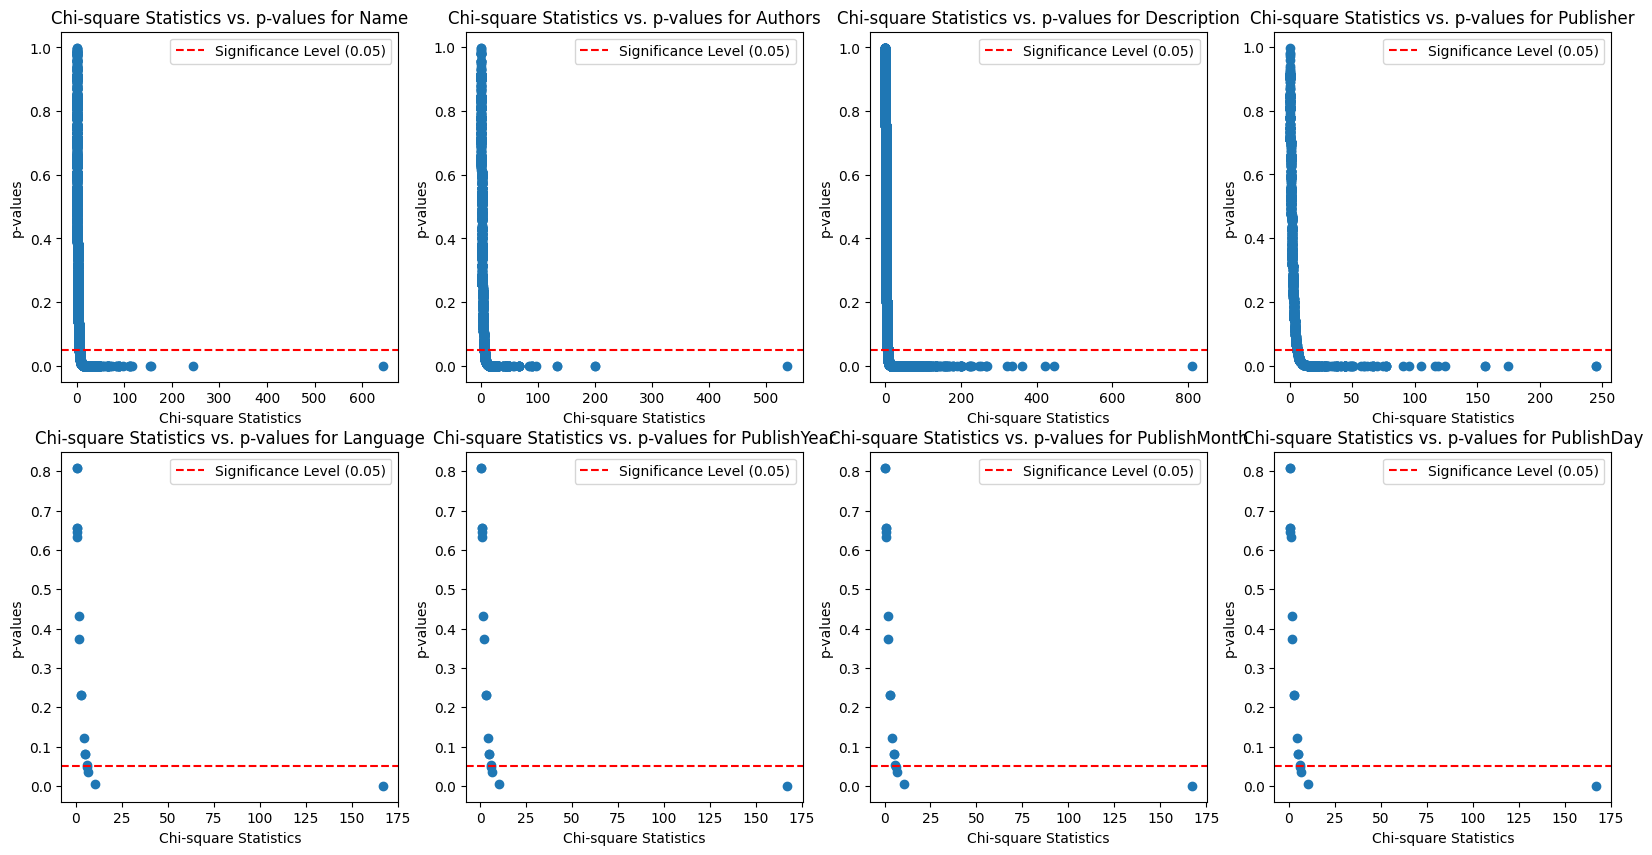

In [11]:
"""
plots for the chisquared-stat & p-values 
"""

import matplotlib.pyplot as plt

# Set the number of rows and columns for the subplots
num_rows = 2
num_cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the features in stats_dict
for i, (feature, values) in enumerate(stats_dict.items()):
    chi2_stat, p_values = values
    
    # Create a scatter plot of chi-square statistics vs. p-values for each feature
    axes[i].scatter(chi2_stat, p_values)
    axes[i].set_xlabel('Chi-square Statistics')
    axes[i].set_ylabel('p-values')
    axes[i].set_title(f'Chi-square Statistics vs. p-values for {feature}')
    axes[i].axhline(0.05, color='r', linestyle='--', label='Significance Level (0.05)')
    axes[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Proportion of Name Below Significance Level: 7.878419980054632%
Proportion of Authors Below Significance Level: 4.5180592290682045%
Proportion of Description Below Significance Level: 36.9596323114946%
Proportion of Publisher Below Significance Level: 2.523522525256905%
Proportion of Language Below Significance Level: 0.017343797424446084%
Proportion of PublishYear Below Significance Level: 0.017343797424446084%
Proportion of PublishMonth Below Significance Level: 0.017343797424446084%
Proportion of PublishDay Below Significance Level: 0.017343797424446084%
Proportion of pagesNumber Below Significance Level: 0.017343797424446084%


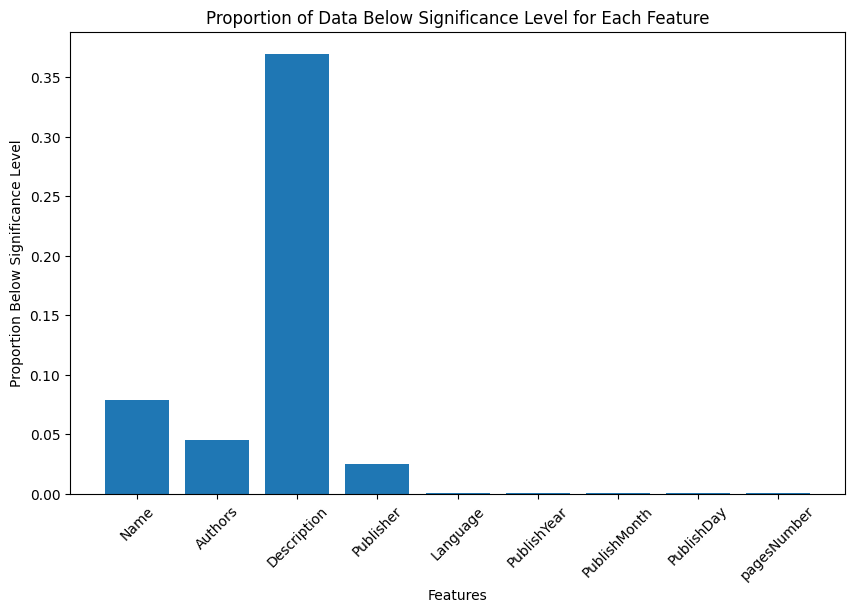

In [12]:
import matplotlib.pyplot as plt

# Define a significance level threshold
significance_level = 0.05

# Iterate over the features in stats_dict
# selected_features = []

feature_names = []
proportions = []

for feature, values in stats_dict.items():
    p_values = values[1]

    # Count the number of p-values below the significance level
    below_threshold = (p_values < significance_level).sum()
    # print(f"n below is {below_threshold} {len(x_train_original)}")

    # Calculate the proportion of data below the significance level
    proportion_below_threshold = below_threshold / len(x_train_original)

    # Append the feature name and proportion to the respective lists
    feature_names.append(feature)
    proportions.append(proportion_below_threshold)

    print(f"Proportion of {feature} Below Significance Level: {proportion_below_threshold * 100}%")

# Use the selected features for further analysis or modeling
# print("Selected Features:", selected_features)

# Plot the proportions as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, proportions)
plt.xlabel('Features')
plt.ylabel('Proportion Below Significance Level')
plt.title('Proportion of Data Below Significance Level for Each Feature')
plt.xticks(rotation=45)
plt.show()

In [29]:
"""
calculate the number of components kept during lsa
"""

# feature_names = []
# proportions = []

# print(feature_names)
vec_name = ['train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec', 'Language', 'PublishYear', 'PublishMonth', 'PublishDay', 'pagesNumber']

retain_features_prop = []
n_components = {}

retain_features = []
min_prop = 100
min_Ncomponents = 100

for i in range(len(proportions)):
    if proportions[i] > 1/100:
        retain_features.append(feature_names[i])
        print(f"feature {feature_names[i]} has proportion {proportions[i]}")
        if min_prop >  proportions[i]:
            min_prop = proportions[i]

print(f"min_pro {min_prop}")

for i in range(len(proportions)):
    if proportions[i] > min_prop:
        # n_components[feature_names[i]] = round(proportions[i]/min_prop * min_Ncomponents + 0.5)
        n_components[vec_name[i]] = round(proportions[i]/min_prop * min_Ncomponents + 0.5)
        # print(f"feature {feature_names[i]} has n_components { n_components[feature_names[i]]}")
    elif proportions[i] == min_prop:
        # n_components[feature_names[i]] = min_Ncomponents
        n_components[vec_name[i]] = min_Ncomponents
        # print(f"feature {feature_names[i]} has n_components { n_components[feature_names[i]]}")


print(retain_features)

feature Name has proportion 0.07878419980054632
feature Authors has proportion 0.045180592290682046
feature Description has proportion 0.369596323114946
feature Publisher has proportion 0.02523522525256905
min_pro 0.02523522525256905
['Name', 'Authors', 'Description', 'Publisher']


In [30]:
"""
now, LSA withe n_components calculated 
"""
# import data ['Name', 'Authors', 'Description', 'Publisher']
import scipy
from sklearn.feature_extraction.text import CountVectorizer

train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_desc_vec = scipy.sparse.load_npz('train_desc_vec.npz')
train_authors_vec = scipy.sparse.load_npz('train_authors_vec.npz')

vectorizer = CountVectorizer()
train_pub_vec = vectorizer.fit_transform(x_train_original['Publisher'].fillna(''))


In [31]:
"""
double check the n_components dict
"""

for key, val in n_components.items():
    print(f"feature_vec {key} has n_components {val}")

feature_vec train_name_vec has n_components 313
feature_vec train_authors_vec has n_components 180
feature_vec train_desc_vec has n_components 1465
feature_vec train_pub_vec has n_components 100


In [32]:
"""
okay, finally, combine the lsa and chi square results together
"""

"""
import the data
"""
import scipy
from sklearn.feature_extraction.text import CountVectorizer
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_desc_vec = scipy.sparse.load_npz('train_desc_vec.npz')
train_authors_vec = scipy.sparse.load_npz('train_authors_vec.npz')

# Create a CountVectorizer object
vectorizer = CountVectorizer()
train_pub_vec = vectorizer.fit_transform(x_train_original['Publisher'].fillna(''))


from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
train_authors_lsa = apply_lsa(train_authors_vec, n_components['train_authors_vec'])
train_desc_lsa = apply_lsa(train_desc_vec, n_components['train_desc_vec'])
train_name_lsa = apply_lsa(train_name_vec, n_components['train_name_vec'])
train_pub_lsa = apply_lsa(train_pub_vec, n_components['train_pub_vec'])


In [342]:
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

#  maybe print out the n_components dictionary to double check things again

(23063, 2058)


In [17]:
"""
calculate the number of components kept during lsa
"""

# feature_names = []
# proportions = []

# print(feature_names)
vec_name = ['test_name_vec', 'test_authors_vec', 'test_desc_vec', 'test_pub_vec', 'Language', 'PublishYear', 'PublishMonth', 'PublishDay', 'pagesNumber']

retain_features_prop = []
test_n_components = {}

retain_features = []
min_prop = 100
min_Ncomponents = 100

for i in range(len(proportions)):
    if proportions[i] > 1/100:
        retain_features.append(feature_names[i])
        print(f"feature {feature_names[i]} has proportion {proportions[i]}")
        if min_prop >  proportions[i]:
            min_prop = proportions[i]

print(f"min_pro {min_prop}")

for i in range(len(proportions)):
    if proportions[i] > min_prop:
        # n_components[feature_names[i]] = round(proportions[i]/min_prop * min_Ncomponents + 0.5)
        test_n_components[vec_name[i]] = round(proportions[i]/min_prop * min_Ncomponents + 0.5)
        # print(f"feature {feature_names[i]} has n_components { n_components[feature_names[i]]}")
    elif proportions[i] == min_prop:
        # n_components[feature_names[i]] = min_Ncomponents
        test_n_components[vec_name[i]] = min_Ncomponents
        # print(f"feature {feature_names[i]} has n_components { n_components[feature_names[i]]}")


print(retain_features)

feature Name has proportion 0.07878419980054632
feature Authors has proportion 0.045180592290682046
feature Description has proportion 0.369596323114946
feature Publisher has proportion 0.02523522525256905
min_pro 0.02523522525256905
['Name', 'Authors', 'Description', 'Publisher']


In [33]:
from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
test_authors_lsa = apply_lsa(test_authors_vec, test_n_components['test_authors_vec'])
test_desc_lsa = apply_lsa(test_desc_vec, test_n_components['test_desc_vec'])
test_name_lsa = apply_lsa(test_name_vec, test_n_components['test_name_vec'])
test_pub_lsa = apply_lsa(test_pub_vec, test_n_components['test_pub_vec'])

In [22]:
X_test_lsa = np.concatenate((test_authors_lsa, test_desc_lsa, test_name_lsa, test_pub_lsa), axis=1)
print(X_test_lsa.shape)

(5766, 2058)


In [53]:
from sklearn.linear_model import LogisticRegression

# Combine the LSA matrices for the three features into a single feature matrix
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='newton-cg')

# Fit the model to the feature matrix and the target variable
logreg_model.fit(X_lsa, y_train)


(23063, 2058)


KeyboardInterrupt: 

In [ ]:
X_test_lsa = np.concatenate((test_authors_lsa, test_desc_lsa, test_name_lsa), axis=1)
# print(X_test_lsa.shape)

y_pred = logreg_model.predict(X_test_lsa)
print(y_pred)

"""
store prediction in csv file
"""

# Assuming that y_pred is a 1D array of predictions
df = pd.DataFrame({'rating_label': y_pred})

# Add 1 to the index to start from 1
df.index = df.index + 1

# Save the DataFrame to a CSV file
df.to_csv('predictions_01.csv', index_label='id')
prediction = pd.read_csv('predictions_01.csv')
print(prediction.shape)
prediction.head()

### Logistic Regression 

In [ ]:
"""
Feature engineering for the testing data 
"""

from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
test_authors_lsa = apply_lsa(test_authors_vec, test_n_components['test_authors_vec'])
test_desc_lsa = apply_lsa(test_desc_vec, test_n_components['test_desc_vec'])
test_name_lsa = apply_lsa(test_name_vec, test_n_components['test_name_vec'])
test_pub_lsa = apply_lsa(test_pub_vec, test_n_components['test_pub_vec'])

In [ ]:
X_test_lsa = np.concatenate((test_authors_lsa, test_desc_lsa, test_name_lsa, test_pub_lsa), axis=1)
print(X_test_lsa.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Combine the LSA matrices for the three features into a single feature matrix
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa), axis=1)
# print(X_lsa.shape)

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=500, multi_class=)

# Fit the model to the feature matrix and the target variable
logreg_model.fit(X_lsa, y_train)

#### Hyperparameters Tuning

In [347]:
"""
Hyparameters' tuning #1 different implementation strategy
"""

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

def compare_strategies(X, y):

    strategies = ['ovr', 'multinomial']
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    results = {}

    for strategy in strategies:
        model = LogisticRegression(multi_class=strategy, max_iter=1000)

        # Perform cross-validation and calculate evaluation metrics
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        accuracy = np.mean(scores)
        precision = np.mean(cross_val_score(model, X, y, cv=5, scoring='precision_weighted'))
        recall = np.mean(cross_val_score(model, X, y, cv=5, scoring='recall_weighted'))
        f1 = np.mean(cross_val_score(model, X, y, cv=5, scoring='f1_weighted'))

        # Store the results
        results[strategy] = [accuracy, precision, recall, f1]

     # Plot the results
    x = np.arange(len(metrics))
    width = 0.15
    fig, ax = plt.subplots()

    for i, strategy in enumerate(strategies):
        scores = results[strategy]
        ax.bar(x + (i * width), scores, width, label=strategy)

    ax.set_ylabel('Score')
    ax.set_title('Comparison of Logistic Regression Implementation Strategy')
    ax.set_xticks(x + (len(strategies) * width) / 2)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.show()

    return results

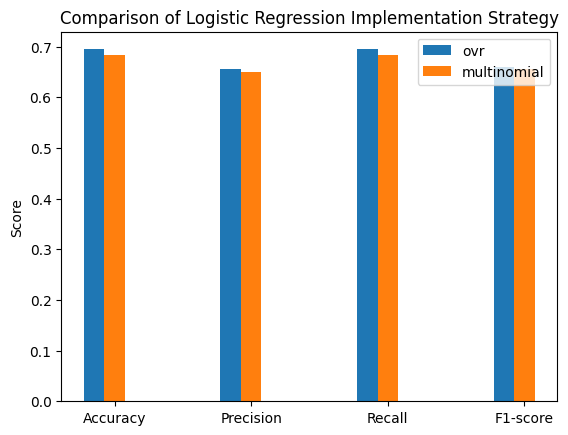

In [348]:
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
LR_imple_strat_dict = compare_strategies(X_lsa, y_train)

In [349]:
"""
Hyparameters' tuning #2 different solvers
Automatically test out different solver for logistic regression and plot the comparison between differen sovler with different evaluation metrices
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

def compare_solvers(X, y):
    solvers = ['lbfgs', 'newton-cg', 'sag', 'saga']
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    results = {}

    for solver in solvers:
        # Create logistic regression model with the current solver
        model = LogisticRegression(solver=solver, multi_class='ovr', max_iter=1000)

        # Perform cross-validation and calculate evaluation metrics
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        accuracy = np.mean(scores)
        precision = np.mean(cross_val_score(model, X, y, cv=5, scoring='precision_weighted'))
        recall = np.mean(cross_val_score(model, X, y, cv=5, scoring='recall_weighted'))
        f1 = np.mean(cross_val_score(model, X, y, cv=5, scoring='f1_weighted'))

        # Store the results
        results[solver] = [accuracy, precision, recall, f1]

    # Plot the results
    x = np.arange(len(metrics))
    width = 0.15
    fig, ax = plt.subplots()

    for i, solver in enumerate(solvers):
        scores = results[solver]
        ax.bar(x + (i * width), scores, width, label=solver)

    ax.set_ylabel('Score')
    ax.set_title('Comparison of Logistic Regression Solvers')
    ax.set_xticks(x + (len(solvers) * width) / 2)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.show()

    return results


In [350]:
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)

compare_solvers(X_lsa, y_train)

c:\Users\chang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

#### Train & Test

In [54]:
"""
same feature engineering to the training set to the testing dataset
"""
# import data 
import scipy
from sklearn.feature_extraction.text import CountVectorizer

test_name_vec = scipy.sparse.load_npz('test_name_vec.npz')
test_desc_vec = scipy.sparse.load_npz('test_desc_vec.npz')
test_authors_vec = scipy.sparse.load_npz('test_authors_vec.npz')

vectorizer = CountVectorizer()
test_pub_vec = vectorizer.fit_transform(x_test_original['Publisher'].fillna(''))


from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
test_authors_lsa = apply_lsa(test_authors_vec, test_n_components['test_authors_vec'])
test_desc_lsa = apply_lsa(test_desc_vec, test_n_components['test_desc_vec'])
test_name_lsa = apply_lsa(test_name_vec, test_n_components['test_name_vec'])
test_pub_lsa = apply_lsa(test_pub_vec, test_n_components['test_pub_vec'])

In [55]:
X_test_lsa = np.concatenate((test_authors_lsa, test_desc_lsa, test_name_lsa, test_pub_lsa), axis=1)
print(X_test_lsa.shape)

(5766, 2058)


In [56]:
from sklearn.linear_model import LogisticRegression

# Combine the LSA matrices for the three features into a single feature matrix
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

# Create a logistic regression model
logreg_model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='newton-cg')

# Fit the model to the feature matrix and the target variable
logreg_model.fit(X_lsa, y_train)


(23063, 2058)


LogisticRegression(max_iter=1000, multi_class='ovr', solver='newton-cg')

In [57]:
X_test_lsa = np.concatenate((test_authors_lsa, test_desc_lsa, test_name_lsa), axis=1)
# print(X_test_lsa.shape)

y_pred = logreg_model.predict(X_test_lsa)
print(y_pred)

"""
store prediction in csv file
"""

# Assuming that y_pred is a 1D array of predictions
df = pd.DataFrame({'rating_label': y_pred})

# Add 1 to the index to start from 1
df.index = df.index + 1

# Save the DataFrame to a CSV file
df.to_csv('predictions_01.csv', index_label='id')
prediction = pd.read_csv('predictions_01.csv')
print(prediction.shape)
prediction.head()

ValueError: X has 1958 features, but LogisticRegression is expecting 2058 features as input.

### Decision Tree

In [44]:
"""
import the trianing data
"""
import scipy
from sklearn.feature_extraction.text import CountVectorizer
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_desc_vec = scipy.sparse.load_npz('train_desc_vec.npz')
train_authors_vec = scipy.sparse.load_npz('train_authors_vec.npz')

# Create a CountVectorizer object
vectorizer = CountVectorizer()
train_pub_vec = vectorizer.fit_transform(x_train_original['Publisher'].fillna(''))


from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
train_authors_lsa = apply_lsa(train_authors_vec, n_components['train_authors_vec'])
train_desc_lsa = apply_lsa(train_desc_vec, n_components['train_desc_vec'])
train_name_lsa = apply_lsa(train_name_vec, n_components['train_name_vec'])
train_pub_lsa = apply_lsa(train_pub_vec, n_components['train_pub_vec'])


In [ ]:
# Combine the LSA matrices for the three features into a single feature matrix
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

In [ ]:
"""
Same feature engineering applied to the testing data 
"""

from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
test_authors_lsa = apply_lsa(test_authors_vec, test_n_components['test_authors_vec'])
test_desc_lsa = apply_lsa(test_desc_vec, test_n_components['test_desc_vec'])
test_name_lsa = apply_lsa(test_name_vec, test_n_components['test_name_vec'])
test_pub_lsa = apply_lsa(test_pub_vec, test_n_components['test_pub_vec'])

In [ ]:
X_test_lsa = np.concatenate((test_authors_lsa, test_desc_lsa, test_name_lsa, test_pub_lsa), axis=1)
print(X_test_lsa.shape)

(23063, 214)


#### Hyperparameters Tunning Grid Search

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

# Create your model
model_DT = DecisionTreeClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(model_DT, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_lsa, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_



(23063, 2058)


In [203]:
print(best_params)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [ ]:
"""
plot the model performance against different values of 'max_depth', 'min_samples_split', and 'min_samples_leaf' 
using a grid search with a DecisionTreeClassifier
"""

import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Data 
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_lsa, y_train)


# Get the results of the grid search
results = grid_search.cv_results_

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print(f"best_parameters for DT using grid search: {best_params}")

# Extract the hyperparameter values and corresponding mean test scores
max_depth_values = results['param_max_depth'].data.astype(int)
min_samples_split_values = results['param_min_samples_split'].data.astype(int)
min_samples_leaf_values = results['param_min_samples_leaf'].data.astype(int)
mean_test_scores = results['mean_test_score']

# Reshape the mean test scores into a grid
num_max_depth = len(param_grid['max_depth'])
num_min_samples_split = len(param_grid['min_samples_split'])
num_min_samples_leaf = len(param_grid['min_samples_leaf'])
mean_test_scores_grid = mean_test_scores.reshape(
    num_max_depth, num_min_samples_split, num_min_samples_leaf
)

# Plot the model performance against different hyperparameter values
fig, ax = plt.subplots(num_max_depth, num_min_samples_split, figsize=(12, 8))

for i in range(num_max_depth):
    for j in range(num_min_samples_split):
        ax[i, j].plot(
            min_samples_leaf_values,
            mean_test_scores_grid[i, j, :],
            marker='o',
            linestyle='-', 
            label=f'max_depth={max_depth_values[i]}',
        )
        ax[i, j].set_xlabel('min_samples_leaf')
        ax[i, j].set_ylabel('Mean Test Score')
        ax[i, j].set_title(f'max_depth={max_depth_values[i]}, min_samples_split={min_samples_split_values[j]}')
        ax[i, j].legend()

plt.tight_layout()
plt.show()


#### Train & Evaluate

In [49]:
from sklearn.tree import DecisionTreeClassifier

best_params = {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}

# Create a new decision tree classifier with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params)

# Fit the best model to the training data
best_model.fit(X_lsa, y_train)

"""
only make prediction after the same feature engineering has been applied to the testing dataset
"""

# Make predictions on the test data using the best model
y_pred_DT = best_model.predict(X_test_lsa) 


"""
store prediction in csv file
"""

# Assuming that y_pred is a 1D array of predictions
y_pred_DT_hyperT = pd.DataFrame({'rating_label': y_pred_DT})

# Add 1 to the index to start from 1
y_pred_DT_hyperT.index = y_pred_DT_hyperT.index + 1

# Save the DataFrame to a CSV file
y_pred_DT_hyperT.to_csv('predictions_DT_hyperT.csv', index_label='id')
prediction = pd.read_csv('predictions_DT_hyperT.csv')
print(prediction.shape)
prediction.head()

(5766, 2)


,id,rating_label
0,1,4.0
1,2,4.0
2,3,4.0
3,4,4.0
4,5,4.0


In [51]:
"""
Cross Validation
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

# Create a new decision tree classifier with the best hyperparameters
model_DT_CV = DecisionTreeClassifier(**best_params)

# Fit the best model to the training data
model_DT_CV.fit(X_lsa, y_train)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores_DT = cross_val_score(model_DT_CV, X_lsa, y_train, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores_DT)

# Calculate and print the average cross-validation score
average_score = cross_val_scores_DT.mean()
print("Average Cross-Validation Score:", average_score)


# Make predictions on the test data using the cross validation model
y_pred_DT = best_model.predict(X_test_lsa) 


"""
store prediction in csv file
"""

# Assuming that y_pred is a 1D array of predictions
y_pred_DT_CV = pd.DataFrame({'rating_label': y_pred})

# Add 1 to the index to start from 1
y_pred_DT_CV.index = y_pred_DT_CV.index + 1

# Save the DataFrame to a CSV file
y_pred_DT_CV.to_csv('predictions_DT_CV_with_hyperT.csv', index_label='id')
prediction = pd.read_csv('predictions_DT_CV_with_hyperT.csv')
print(prediction.shape)
prediction.head()

(23063, 2058)
Cross-Validation Scores: [0.70388034 0.70409712 0.7062649  0.70641804 0.70511709]
Average Cross-Validation Score: 0.7051554968621617


AttributeError: 'numpy.ndarray' object has no attribute 'index'

##### Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

# Create a Random Forest classifier with desired hyperparameters
rf_model = RandomForestClassifier(**best_params)

# Perform cross-validation
scores = cross_val_score(rf_model, X_lsa, y_train, cv=5)  # Change cv value as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())


Cross-Validation Scores: [0.70474745 0.7043139  0.70669846 0.70381613 0.70468343]
Mean Score: 0.7048518751166855


In [206]:
"""
store prediction in csv file
"""

# Make predictions on the test data using the best model
y_pred_DT_RF = rf_model.predict(X_test_lsa)

# Assuming that y_pred is a 1D array of predictions
y_pred_DT_RF_CV = pd.DataFrame({'rating_label': y_pred_DT_RF})

# Add 1 to the index to start from 1
y_pred_DT_RF_CV.index = y_pred_DT_RF_CV.index + 1

# Save the DataFrame to a CSV file
y_pred_DT_RF_CV.to_csv('predictions_DT_RF_CV.csv', index_label='id')
prediction = pd.read_csv('predictions_DT_RF_CV.csv')
print(prediction.shape)
prediction.head()

(5766, 2)


,id,rating_label
0,1,4.0
1,2,4.0
2,3,4.0
3,4,4.0
4,5,4.0


### 0R Baseline 

In [ ]:
"""
feature engineering to the trianing data
"""
y_train = x_train_original['rating_label']

import scipy
from sklearn.feature_extraction.text import CountVectorizer
train_name_vec = scipy.sparse.load_npz('train_name_vec.npz')
train_desc_vec = scipy.sparse.load_npz('train_desc_vec.npz')
train_authors_vec = scipy.sparse.load_npz('train_authors_vec.npz')

# Create a CountVectorizer object
vectorizer = CountVectorizer()
train_pub_vec = vectorizer.fit_transform(x_train_original['Publisher'].fillna(''))

from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
train_authors_lsa = apply_lsa(train_authors_vec, n_components['train_authors_vec'])
train_desc_lsa = apply_lsa(train_desc_vec, n_components['train_desc_vec'])
train_name_lsa = apply_lsa(train_name_vec, n_components['train_name_vec'])
train_pub_lsa = apply_lsa(train_pub_vec, n_components['train_pub_vec'])


In [ ]:
# Combine the LSA matrices for the three features into a single feature matrix
X_lsa = np.concatenate((train_authors_lsa, train_desc_lsa, train_name_lsa, train_pub_lsa), axis=1)
print(X_lsa.shape)

In [ ]:
"""
Same feature engineering applied to the testing data 
"""

from sklearn.decomposition import TruncatedSVD
def apply_lsa(feature_vec, n_components):
    lsa_model = TruncatedSVD(n_components=n_components)
    lsa_model.fit(feature_vec)
    lsa_result = lsa_model.transform(feature_vec)

    return lsa_result

# 'train_name_vec', 'train_authors_vec', 'train_desc_vec', 'train_pub_vec'
test_authors_lsa = apply_lsa(test_authors_vec, test_n_components['test_authors_vec'])
test_desc_lsa = apply_lsa(test_desc_vec, test_n_components['test_desc_vec'])
test_name_lsa = apply_lsa(test_name_vec, test_n_components['test_name_vec'])
test_pub_lsa = apply_lsa(test_pub_vec, test_n_components['test_pub_vec'])

In [ ]:
X_test_lsa = np.concatenate((test_authors_lsa, test_desc_lsa, test_name_lsa, test_pub_lsa), axis=1)
print(X_test_lsa.shape)

In [ ]:
"""
Always guess the most common label in the training set
"""


label_freq_dict = {}

for i in y_train:
    if i not in label_freq_dict:
        label_freq_dict[i] = 1
    else:
        label_freq_dict[i] += 1

total_label_num = len(y_train)

highest_val = 0
most_common_label = None
for key, val in label_freq_dict.items():
    # print(f"label {key} ccur {val} times")
    if val > highest_val:
        highest_val = val
        most_common_label = key 

print(f"always guess the most common label {most_common_label}, with error rate {highest_val / total_label_num}")




# y_pred_0R = pd.DataFrame(np.repeat(most_common_label, x_test_original.shape[0], axis=0))

"""
store prediction in csv file
"""

# Assuming that y_pred is a 1D array of predictions
y_pred_0R = pd.DataFrame({'rating_label': np.repeat(most_common_label, x_test_original.shape[0], axis=0)})

# Add 1 to the index to start from 1
y_pred_0R.index = y_pred_0R.index + 1

# Save the DataFrame to a CSV file
y_pred_0R.to_csv('predictions_0R.csv', index_label='id')
prediction = pd.read_csv('predictions_0R.csv')
print(prediction.shape)
prediction.head()